# LIBRARY IMPORT

In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# DATA IMPORT

In [267]:
df = pd.read_csv('processed.csv')
df = df.drop(['Unnamed: 0', 'duration'], axis = 1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [254]:
df['y'] = df['y'].replace('no', 0)
df['y'] = df['y'].replace('yes', 1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50s,housemaid,married,basic.4y,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,50s,services,married,high.school,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,30s,services,married,high.school,yes,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40s,admin.,married,basic.6y,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,50s,services,married,high.school,no,yes,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# LOGISTIC

In [255]:
X = df.drop(['y'], axis = 1)
x_feats = X.columns
y = df['y']

In [257]:
X = pd.get_dummies(X, drop_first = True)
X.head()
X.columns

Index(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_40s', 'age_50s',
       'age_60s', 'age_70s', 'age_80+', 'age_under 30', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [258]:
for col in X.columns:
    X[col] = (X[col] - min(X[col]))/ (max(X[col]) - min(X[col]))

In [259]:
X.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_40s,age_50s,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [261]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [262]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [223]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [263]:
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.6791666666666667
Testing Precision:  0.6303797468354431



Training Recall:  0.2340608845491097
Testing Recall:  0.21502590673575128



Training Accuracy:  0.9012009970541581
Testing Accuracy:  0.8975429736816548



Training F1-Score:  0.3481418197351559
Testing F1-Score:  0.32066967160334836


Train AUC: 0.7948498691372206
Test AUC: 0.7910097381054567


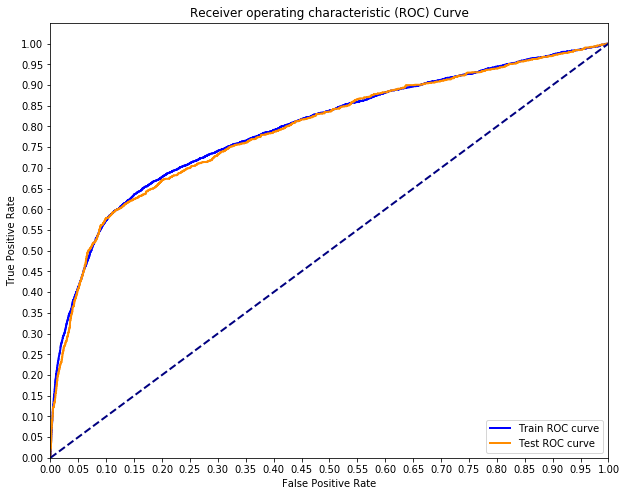

In [225]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [49]:
X.columns

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_80+', 'age_under 30',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [227]:
emp_var_rate_dummies = pd.get_dummies(X['emp.var.rate'], drop_first = True, prefix = 'emp_var')
cons_price_index_dummies = pd.get_dummies(X['cons.price.idx'], drop_first = True, prefix = 'cons_price')
cons_conf_index_dummies = pd.get_dummies(X['cons.conf.idx'], drop_first = True, prefix = 'cons_conf')
euribor3m_dummies = pd.get_dummies(X['euribor3m'], drop_first = True, prefix = 'euri')
nr_employed_dummies = pd.get_dummies(X['nr.employed'], drop_first = True, prefix = 'nr_employed')

In [228]:
test_X = X.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis = 1)

In [229]:
test_X = pd.concat([test_X, emp_var_rate_dummies, cons_price_index_dummies, cons_conf_index_dummies, euribor3m_dummies, nr_employed_dummies], axis = 1)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(test_X, y, random_state=0)

In [231]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [249]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 100)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(C=1000000000000.0, class_weight=None,
                                 dual=False, fit_intercept=False,
                                 intercept_scaling=1, l1_ratio=None,
                                 max_iter=100, multi_class='warn', n_jobs=None,
                                 penalty='l2', random_state=None,
                                 solver='liblinear', tol=0.0001, verbose=0,
                                 warm_start=False),
    n_features_to_select=100, step=1, verbose=0)

In [250]:
rfe

RFE(estimator=LogisticRegression(C=1000000000000.0, class_weight=None,
                                 dual=False, fit_intercept=False,
                                 intercept_scaling=1, l1_ratio=None,
                                 max_iter=100, multi_class='warn', n_jobs=None,
                                 penalty='l2', random_state=None,
                                 solver='liblinear', tol=0.0001, verbose=0,
                                 warm_start=False),
    n_features_to_select=100, step=1, verbose=0)

In [251]:
rfe_hat_test = rfe.predict(X_test)
rfe_hat_train = rfe.predict(X_train)

In [252]:
cnf_matrix = confusion_matrix(y_test, rfe_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, rfe_hat_train))
print('Testing Precision: ', precision_score(y_test, rfe_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, rfe_hat_train))
print('Testing Recall: ', recall_score(y_test, rfe_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, rfe_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, rfe_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, rfe_hat_train))
print('Testing F1-Score: ', f1_score(y_test, rfe_hat_test))

Confusion Matrix:
 [[9014  125]
 [ 941  217]]
Training Precision:  0.73904576436222
Testing Precision:  0.6345029239766082



Training Recall:  0.21797817346352671
Testing Recall:  0.18739205526770294



Training Accuracy:  0.903175682237545
Testing Accuracy:  0.8964747013693308



Training F1-Score:  0.3366600133067199
Testing F1-Score:  0.28933333333333333


In [232]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [235]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[8958  181]
 [ 868  290]]


In [233]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.6877444589308996
Testing Precision:  0.6157112526539278



Training Recall:  0.30298678920160826
Testing Recall:  0.2504317789291883



Training Accuracy:  0.9059272927389854
Testing Accuracy:  0.8981256676701952



Training F1-Score:  0.4206539074960128
Testing F1-Score:  0.3560466543891959


Train AUC: 0.8125447659089913
Test AUC: 0.8007194961108242


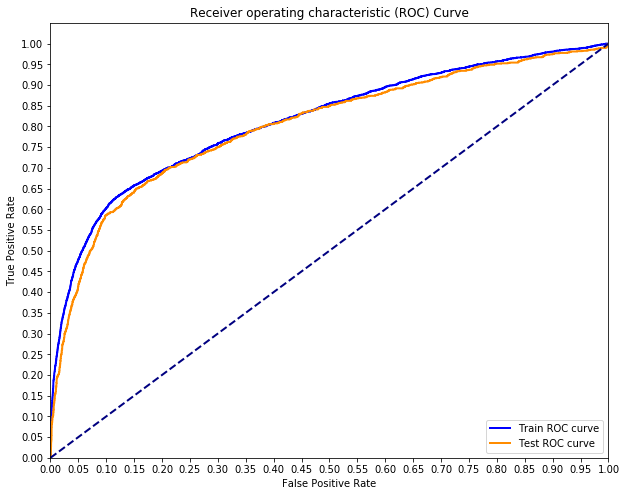

In [234]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Overall, just our logistic regression gave us mediocre results. We do have a nice-looking ROC curve and decently-high AUC numbers (as well as fairly high accuracy), however, our Precision, Recall, and F1 scores leave a lot to be desired. Let's explore some other models and look at some other ways to deal with the class imbalance.

# DECISION TREE

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

clf = DecisionTreeClassifier(criterion='entropy')

In [166]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [167]:
y_pred = clf.predict(X_test) 

In [168]:
y_hat_test = clf.predict(X_test)
y_hat_train = clf.predict(X_train)

In [62]:
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  1.0
Testing Precision:  0.5167224080267558



Training Recall:  0.9997128087306146
Testing Recall:  0.533678756476684



Training Accuracy:  0.9999676281117478
Testing Accuracy:  0.8914246868019812



Training F1-Score:  0.9998563837426397
Testing F1-Score:  0.5250637213254037


In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7352166624050998

Definitely a huge problem with overfitting with the training data. I am going to need to take a look at the hyperparameters to fix this.

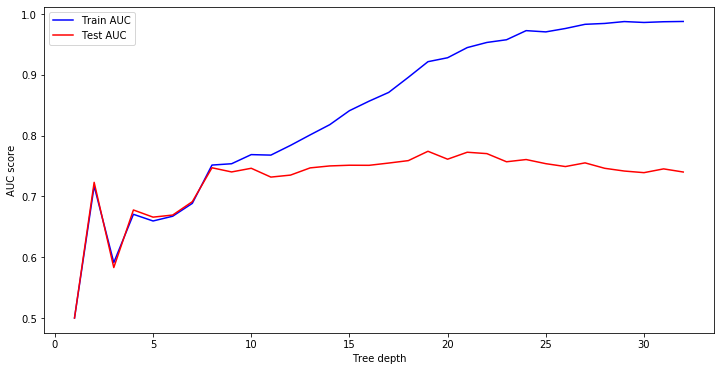

In [64]:
SEED = 5

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

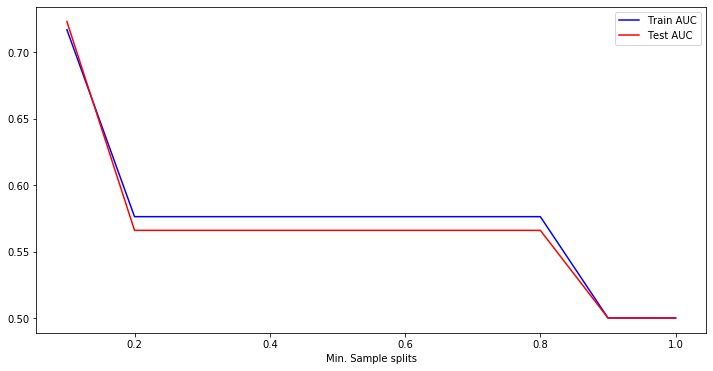

In [65]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

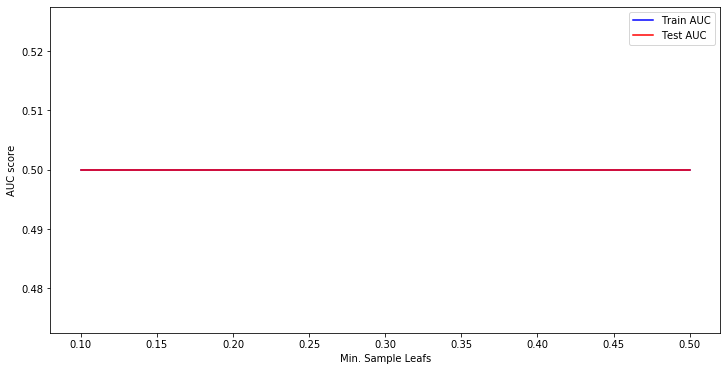

In [66]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

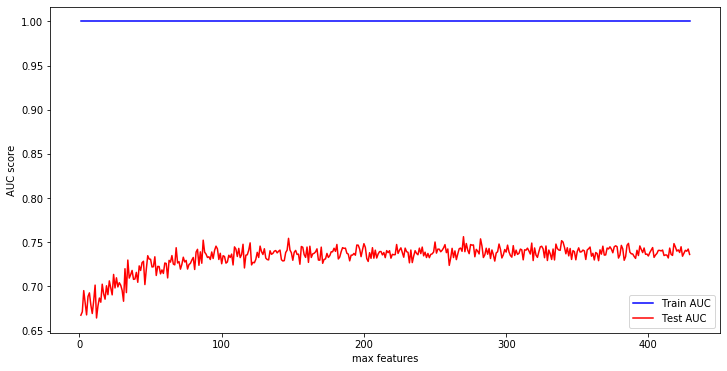

In [67]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [169]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=23,
                           max_depth=10,
                           min_samples_split=0.4,
                           min_samples_leaf=0.25, 
                           random_state=SEED)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6160910338712356

In [170]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
forest.score(X_train, y_train)

0.9004564436243566

In [172]:
forest_pred = forest.predict(X_test)

In [173]:
accuracy_score(y_test, forest_pred)

0.8976400893464116

In [174]:
f1_score(y_test, forest_pred)

0.2839673913043478

In [175]:
recall_score(y_test, forest_pred)

0.18048359240069084

# Oversample

In [75]:
from sklearn.utils import resample

In [76]:
print(test_X.shape)
print(X.shape)
print(y.shape)

(41188, 430)
(41188, 51)
(41188,)


In [176]:
X_train, X_test, y_train, y_test = train_test_split(test_X, y, test_size=0.25, random_state=27)

In [177]:
oversample_x = pd.concat([X_train, y_train], axis=1)

In [178]:
nope = oversample_x[oversample_x.y==0]
yep = oversample_x[oversample_x.y==1]

In [179]:
my_data_upsampled = resample(yep,
                          replace=True, # sample with replacement
                          n_samples=len(nope), # match number in majority class
                          random_state=27) # reproducible results

In [180]:
total_upsample = pd.concat([nope, my_data_upsampled])

In [181]:
total_upsample['y'].value_counts()

1    27455
0    27455
Name: y, dtype: int64

In [182]:
new_y_train = total_upsample['y']
new_x_train = total_upsample.drop(['y'], axis = 1)

In [183]:
upsampled = LogisticRegression(solver='liblinear').fit(new_x_train, new_y_train)

In [184]:
upsampled_pred = upsampled.predict(X_test)

In [185]:
accuracy_score(y_test, upsampled_pred)

0.8703505875497718

In [186]:
f1_score(y_test, upsampled_pred)

0.6142733314071077

In [187]:
recall_score(y_test, upsampled_pred)

0.882890365448505

In [188]:
precision_score(y_test, upsampled_pred)

0.47097917589720867

In [90]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 20)
forest.fit(new_x_train, new_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
forest.score(new_x_train, new_y_train)

0.9661081770169369

In [92]:
forest_pred = forest.predict(X_test)

In [189]:
print(accuracy_score(y_test, forest_pred))
print(f1_score(y_test, forest_pred))
print(recall_score(y_test, forest_pred))
print(precision_score(y_test, forest_pred))

0.858599592114208
0.04084321475625823
0.02574750830564784
0.09872611464968153


# PARAMETER SEARCHING

In [94]:
rf_clf = RandomForestClassifier()

In [95]:
from sklearn.model_selection import cross_val_score
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, new_x_train, new_y_train, cv=3))

/Users/forestfranzose7/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/forestfranzose7/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/forestfranzose7/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [96]:
print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 96.95%


In [97]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [98]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)

NameError: name 'GridSearchCV' is not defined

In [ ]:
rf_grid_search.fit(new_x_train, new_y_train)
print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

In [ ]:
forest = RandomForestClassifier(n_estimators=100,
                                max_depth = None,
                                criterion = 'entropy',
                                min_samples_leaf = 3,
                                min_samples_split = 5,
                               )
forest.fit(new_x_train, new_y_train)

In [ ]:
forest_pred = forest.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, forest_pred))
print('F1:', f1_score(y_test, forest_pred))
print('Recall:', recall_score(y_test, forest_pred))
print('Precision:', precision_score(y_test, forest_pred))

In [ ]:
forest = RandomForestClassifier(n_estimators=100,
                                max_depth = None,
                                criterion = 'entropy',
                                min_samples_leaf = 3,
                                min_samples_split = 5,
                               )
forest.fit(X_train, y_train)

In [ ]:
forest_pred = forest.predict(X_test)

In [ ]:
print(accuracy_score(y_test, forest_pred))
print(f1_score(y_test, forest_pred))
print(recall_score(y_test, forest_pred))
print(precision_score(y_test, forest_pred))

# XGBOOST - again lol

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [123]:
import xgboost as xgb
clf = xgb.XGBClassifier(learning_rate = .1, max_depth = 6, min_child_weight = 10, n_estimators = 250, subsample = .7)
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [124]:
print('TRAIN')
print(accuracy_score(y_train, training_preds))
print(recall_score(y_train, training_preds))
print(precision_score(y_train, training_preds))
print(f1_score(y_train, training_preds))
print('TEST')
print(accuracy_score(y_test, val_preds))
print(recall_score(y_test, val_preds))
print(precision_score(y_test, val_preds))
print(f1_score(y_test, val_preds))

TRAIN
0.944029005211874
0.6685098952270081
0.7956356078974715
0.7265538510200854
TEST
0.9133728270370011
0.5506644518272426
0.6538461538461539
0.5978358881875564


In [193]:
oversample_x = pd.concat([X_train, y_train], axis=1)

In [194]:
nope = oversample_x[oversample_x.y==0]
yep = oversample_x[oversample_x.y==1]

In [195]:
my_data_upsampled = resample(yep,
                          replace=True, # sample with replacement
                          n_samples=len(nope), # match number in majority class
                          random_state=27) # reproducible results

In [196]:
total_upsample = pd.concat([nope, my_data_upsampled])

In [197]:
total_upsample['y'].value_counts()

1    27455
0    27455
Name: y, dtype: int64

In [198]:
new_y_train = total_upsample['y']
new_x_train = total_upsample.drop(['y'], axis = 1)

# THIS ONE

In [210]:
clf = xgb.XGBClassifier(learning_rate = .1, max_depth = 7, max_child_weight = 10, n_estimators = 30, subsample = .7)
clf.fit(new_x_train, new_y_train)
training_preds = clf.predict(new_x_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(new_y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [211]:
print(accuracy_score(new_y_train, training_preds))
print(recall_score(new_y_train, training_preds))
print(precision_score(new_y_train, training_preds))
print(f1_score(new_y_train, training_preds))

0.7702240029138591
0.6598069568384629
0.8468118922961855
0.7417036870227445


In [212]:
print(accuracy_score(y_test, val_preds))
print(recall_score(y_test, val_preds))
print(precision_score(y_test, val_preds))
print(f1_score(y_test, val_preds))

0.8475284063319414
0.6320598006644518
0.4030720338983051
0.49223803363518753


In [152]:
from sklearn.metrics import confusion_matrix

In [213]:
cnf_matrix = confusion_matrix(y_test, val_preds)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[7966 1127]
 [ 443  761]]


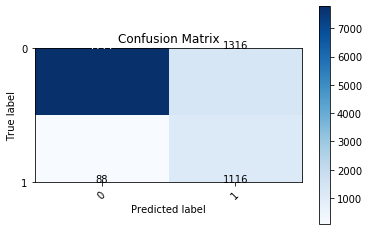

In [154]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [135]:
clf = xgb.XGBClassifier(learning_rate = .1, max_depth = 7, min_child_weight = 10, n_estimators = 250, subsample = .7)
clf.fit(new_x_train, new_y_train)
training_preds = clf.predict(new_x_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(new_y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [136]:
print('TRAIN')
print(accuracy_score(new_y_train, training_preds))
print(recall_score(new_y_train, training_preds))
print(precision_score(new_y_train, training_preds))
print(f1_score(new_y_train, training_preds))
print('TEST')
print(accuracy_score(y_test, val_preds))
print(recall_score(y_test, val_preds))
print(precision_score(y_test, val_preds))
print(f1_score(y_test, val_preds))

TRAIN
0.9435621926789292
0.9851757421234748
0.9094821788836583
0.9458169420403881
TEST
0.8863746722346314
0.8853820598006644
0.5081029551954243
0.6456692913385826


In [1]:
clf = xgb.XGBClassifier(max_depth = 5,
                        min_child_weight = 1,
                        gamma = 0,
                        subsample = .8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.8,
                        learning_rate = .1,   
                        n_estimators = 250,
                        )
clf.fit(new_x_train, new_y_train)
training_preds = clf.predict(new_x_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(new_y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

NameError: name 'xgb' is not defined

In [114]:
X_train, X_test, y_train, y_test = train_test_split(test_X, y, test_size=0.25, random_state=27)

In [117]:
clf = xgb.XGBClassifier(learning_rate = .1, max_depth = 6, min_child_weight = 10, n_estimators = 250, subsample = .7)
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [119]:
print('TRAIN')
print(accuracy_score(y_train, training_preds))
print(recall_score(y_train, training_preds))
print(precision_score(y_train, training_preds))
print(f1_score(y_train, training_preds))
print('TEST')
print(accuracy_score(y_test, val_preds))
print(recall_score(y_test, val_preds))
print(precision_score(y_test, val_preds))
print(f1_score(y_test, val_preds))

TRAIN
0.9339937198536791
0.6123399301513388
0.7484880825329064
0.6736033295982071
TEST
0.9147324463435952
0.5456810631229236
0.6649797570850202
0.5994525547445256


In [120]:
X.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_40s,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.053070,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.030297,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.045954,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.030704,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.062424,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
